In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 36.4 MB/s 


In [ ]:
import pandas as pd
import pickle
# filename = 'finalized_model.sav'
# pickle.dump(dtree, open(filename, 'wb')) 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(X_test)
# print(y_pred)


In [ ]:
!pip install xlrd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openpyxl --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xlrd

In [ ]:
missing_values = ["n/a", "na", "--"]

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/WD_Data_all-COVID-19_Stellenbosch.xls - Sheet1.csv', na_values = missing_values)


In [ ]:
df1.shape

(490, 154)

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/WD_Data_all-COVID-19_Stellenbosch.xls - Sheet2.csv', na_values = missing_values)


In [ ]:
df2.shape

(490, 2)

In [ ]:
death=df2.iloc[:,-1]

In [ ]:
death.head()

0        Death
1        Death
2        Death
3    Discharge
4        Death
Name: discharge_death, dtype: object

In [ ]:
df=df1

In [ ]:
df['Death']=death

In [ ]:
df.head()

,hospital_number,Na,K,k,Clin,hco3std,ventilation,ventilation_mode,HbA1c,Albumin,...,immunodeficiency,tb_1,copd,ckd,hospital_number.1,venti,ag_n,ag,153,Death
0,121265060,131.0,6.0,5.0,96.0,28.0,High Flow,NaN,NaN,NaN,...,1.0,2.0,1.0,1.0,121265060,Non-invasive,8.0,13.0,NaN,Death
1,38461596,128.0,3.0,3.0,98.0,29.0,Other,NaN,6.0,NaN,...,1.0,2.0,1.0,1.0,38461596,Non-invasive,1.0,4.0,NaN,Death
2,87594446,128.0,4.0,3.0,97.0,29.0,High Flow,NaN,12.0,NaN,...,1.0,2.0,1.0,1.0,87594446,Non-invasive,2.0,6.0,NaN,Death
3,42450692,135.0,4.0,3.0,114.0,19.0,Other,NaN,NaN,NaN,...,1.0,2.0,1.0,1.0,42450692,Non-invasive,2.0,6.0,NaN,Discharge
4,24941833,134.0,5.0,4.0,103.0,28.0,Other,NaN,7.0,NaN,...,1.0,2.0,1.0,1.0,24941833,Non-invasive,3.0,8.0,NaN,Death


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Columns: 155 entries, hospital_number to Death
dtypes: float64(112), int64(7), object(36)
memory usage: 593.5+ KB


In [ ]:
L=list(df.columns)

In [ ]:
df.columns[df.isnull().any()]


Index(['Na', 'K', 'k', 'Clin', 'hco3std', 'ventilation_mode', 'HbA1c',
       'Albumin', 'ALP', 'ALT',
       ...
       'hiv_status_1', 'hiv_new_diag', 'immunodeficiency', 'tb_1', 'copd',
       'ckd', 'ag_n', 'ag', '153', 'Death'],
      dtype='object', length=142)

In [ ]:
df['ventilation'].value_counts()

Other        206
High Flow    178
Intubated     89
NIV/CPAP      17
Name: ventilation, dtype: int64

In [ ]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hospital_number   490 non-null    int64  
 1   Na                482 non-null    float64
 2   K                 478 non-null    float64
 3   k                 471 non-null    float64
 4   Clin              404 non-null    float64
 5   hco3std           417 non-null    float64
 6   ventilation       490 non-null    object 
 7   ventilation_mode  79 non-null     object 
 8   HbA1c             374 non-null    float64
 9   Albumin           97 non-null     float64
 10  ALP               98 non-null     float64
 11  ALT               458 non-null    float64
 12  AST               233 non-null    float64
 13  Basophils         478 non-null    float64
 14  Ca                293 non-null    float64
 15  Creatinine        482 non-null    float64
 16  DDimer            464 non-null    float64
 1

In [ ]:
df[['Na', 'K', 'ventilation_mode', 'Urea', 'date_adm_icu_1',  'diab_mellitus', 'age_at_admission_in_comple', 'gender','HIVstatus', 'septic_shock', 'hypertension']].tail()

,Na,K,ventilation_mode,Urea,date_adm_icu_1,diab_mellitus,age_at_admission_in_comple,gender,HIVstatus,septic_shock,hypertension
485,133.0,5.0,p-simv,24.0,14/10/2020,2.0,74.0,Female,NaN,2.0,2.0
486,137.0,5.0,NaN,17.0,11/10/2020,1.0,76.0,Male,NaN,2.0,2.0
487,140.0,4.0,NaN,22.0,5/9/2020,NaN,21.0,Female,NaN,NaN,NaN
488,NaN,NaN,p-simv,NaN,10/12/2020,1.0,56.0,Female,NaN,2.0,2.0
489,136.0,6.0,aprv,8.0,4/11/2020,2.0,52.0,Female,NaN,2.0,2.0


|**Na**|**K**|**ventilation_mode**|**Urea**|**date_adm_icu**|**diab_mellitus**|**age**|**gender**|**HIVstatus**|**septic_shock**|**hypertension**|	
|-------|---------|---------|-------|--------|--------|----------|----------|----------|----------|----------|
|133.0|5.0|p-simv|24.0|14/10/2020|2.0|74.0|Female|NaN|2.0|2.0|
|137.0|5.0|NaN|17.0|11/10/2020|1.0|76.0|Male|NaN|2.0|2.0|
|140.0|4.0|NaN|22.0|05/09/2020|NaN|21.0|Female|NaN|NaN|NaN|
|NaN|NaN|p-simv|NaN|10/12/2020|1.0|56.0|Female|NaN|2.0|2.0|
|136.0|6.0|aprv|8.0|04/11/2020|2.0|52.0|Female|NaN|2.0|2.0|



<math><mrow is="true"><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><mi is="true">θ</mi><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced></mrow></mfenced><mo is="true">=</mo><mo is="true">∫</mo><mrow is="true"><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><mi is="true">θ</mi><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced><mo is="true">,</mo><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub></mrow></mfenced><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced></mrow></mfenced><mtext is="true">d</mtext><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub></mrow><mtext is="true">,</mtext></mrow></math>

<math><mrow is="true"><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><mi is="true">θ</mi><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced></mrow></mfenced><mo is="true">=</mo><mo is="true">∫</mo><mrow is="true"><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><mi is="true">θ</mi><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced><mo is="true">,</mo><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub></mrow></mfenced><mi is="true">P</mi><mfenced close=")" open="(" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub><mfenced close="" open="|" is="true"><mrow is="true"><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">obs</mtext></mrow></msub></mrow></mfenced></mrow></mfenced><mtext is="true">d</mtext><msub is="true"><mstyle mathvariant="bold-italic" is="true"><mi is="true">Y</mi></mstyle><mrow is="true"><mtext is="true">mis</mtext></mrow></msub></mrow><mtext is="true">,</mtext></mrow></math>

Remove all columns with 30% of missing data

In [ ]:
L=[]
L_less=[]
for i in df.columns:
  if((df[i].isnull().sum())<(0.3*(df.shape[0]))):
    L.append(i)
  else:
    L_less.append(i)



In [ ]:
len(L)


122

In [ ]:
L

['hospital_number',
 'Na',
 'K',
 'k',
 'Clin',
 'hco3std',
 'ventilation',
 'HbA1c',
 'ALT',
 'Basophils',
 'Creatinine',
 'DDimer',
 'Ferritin',
 'Hb',
 'Hct',
 'INR',
 'Lymphocytes',
 'MCHC',
 'MCV',
 'Monocytes',
 'MPV',
 'Platelets',
 'RCC',
 'Urea',
 'RCDW',
 'TropT',
 'PCT',
 'WCC',
 'Tbili',
 'NTProBNP',
 'Neutrophils',
 'CRP',
 'time',
 'fi02',
 'pf_ratio',
 'date_adm_icu_1',
 'time_to_icu_from_admission_1',
 'icu_discharge_death',
 'date_icu_disch_death_1',
 'duration_icu_1',
 'days_disch_death_1',
 'date_1',
 'ph',
 'paco2',
 'pao2',
 'lactate',
 'so2c',
 'date_of_admission_to_tbh',
 'discharge_death',
 'date_tbh_disch_death_1',
 'length_of_stay_in_hospital',
 'dob',
 'age_at_admission_in_comple',
 'gender',
 'wave_',
 'weights',
 'date',
 'antibiotics',
 'antifungals',
 'antivirals',
 'anticoagulants',
 'corticosteroids',
 'other_medications_select___1',
 'other_medications_select___2',
 'other_medications_select___3',
 'other_medications_select___4',
 'other_medications_se

In [ ]:
len(L_less)

33

In [ ]:
df=df[L]

In [ ]:
df.drop(['discharge_death','icu_discharge_death'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.shape

(490, 120)

In [ ]:
df['symp_bp_sys']

0      127.0
1      121.0
2      125.0
3      108.0
4      173.0
       ...  
485    147.0
486    147.0
487      NaN
488     60.0
489     78.0
Name: symp_bp_sys, Length: 490, dtype: float64

In [ ]:
df['symp_bp_dias']

0      85.0
1      82.0
2      71.0
3      68.0
4      70.0
       ... 
485    54.0
486    92.0
487     NaN
488    40.0
489    69.0
Name: symp_bp_dias, Length: 490, dtype: float64

In [ ]:
df['hypertension']

0      2.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
485    2.0
486    2.0
487    NaN
488    2.0
489    2.0
Name: hypertension, Length: 490, dtype: float64

In [ ]:
# rows['symp_bp_sys'], rows['symp_bp_dias']
df[['symp_bp_sys','symp_bp_dias']][:10]

,symp_bp_sys,symp_bp_dias
0,127.0,85.0
1,121.0,82.0
2,125.0,71.0
3,108.0,68.0
4,173.0,70.0
5,135.0,70.0
6,156.0,104.0
7,167.0,78.0
8,145.0,81.0
9,112.0,64.0


In [ ]:
import numpy as np

In [ ]:
# This is South African Categories
def categories_BP(df):
  L=[]
  for i,rows in df.iterrows():
    Systolic, diastolic = rows['symp_bp_sys'], rows['symp_bp_dias']
  # num, denom = s.split('/')
  # Systolic, diastolic= float(num),float(denom)
  # return num, denom
    if((Systolic<=120) and (diastolic<80)):
      L.append('Normal')
    elif((Systolic>=120 and Systolic<=129) and (diastolic<80)):
      L.append('Optimal')
    elif((Systolic>=130 and Systolic<=139) or (diastolic>=80 and diastolic<=89)):
      L.append('High Normal')
    elif((Systolic>=140 and Systolic<=159) or (diastolic>=90 and diastolic<=99)):
      L.append('Mild_Hypertension')
    elif((Systolic>=160 and Systolic<=179) or (diastolic>=100 and diastolic<=109)):
      L.append('Moderate_Hypertension')
    elif((Systolic>=180) or (diastolic>=110)):
      L.append('Severe_Hypertension')
    elif((Systolic>=140) and (diastolic<90)):
      L.append('Isolated Systolic')
    else:
      L.append(np.nan)
  return L

In [ ]:
df.insert(2, column='BP_Average', value=categories_BP(df))

In [ ]:
df.drop(['symp_bp_sys','symp_bp_dias'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df['BP_Average']

0                High Normal
1                High Normal
2                    Optimal
3                     Normal
4      Moderate_Hypertension
               ...          
485        Mild_Hypertension
486        Mild_Hypertension
487                      NaN
488                   Normal
489                   Normal
Name: BP_Average, Length: 490, dtype: object

In [ ]:
import numpy as np

In [ ]:
numeric_data=df.select_dtypes(include=np.number)


In [ ]:
non_numeric=df.select_dtypes(include = ['object'])


In [ ]:
list(non_numeric.columns)

['BP_Average',
 'ventilation',
 'time',
 'date_adm_icu_1',
 'date_icu_disch_death_1',
 'date_1',
 'date_of_admission_to_tbh',
 'date_tbh_disch_death_1',
 'dob',
 'gender',
 'date',
 'antibiotics',
 'antifungals',
 'antivirals',
 'anticoagulants',
 'corticosteroids',
 'other_medications_select___1',
 'other_medications_select___2',
 'other_medications_select___3',
 'other_medications_select___4',
 'other_medications_select___5',
 'other_medications_select___6',
 'other_medications_select___7',
 'other_medications_select___8',
 'other_medications_select___9',
 'other_medications_select___10',
 'other_medications_select___11',
 'other_medications_select___12',
 'venti',
 'Death']

# Imputation Methods

Using a multivariate imputation method to deal with missing values

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
imp.fit(numeric_data)

IterativeImputer(random_state=0)

In [ ]:
imputed_numeric=np.round(imp.transform(numeric_data))

In [ ]:
imputed_numeric.shape

(490, 89)

In [ ]:
num_df=pd.DataFrame(imputed_numeric, columns=numeric_data.columns)

In [ ]:
num_df.head()

,hospital_number,Na,K,k,Clin,hco3std,HbA1c,ALT,Basophils,Creatinine,...,bmi,ptld,hiv_status_1,immunodeficiency,tb_1,copd,ckd,hospital_number.1,ag_n,ag
0,121265060.0,131.0,6.0,5.0,96.0,28.0,9.0,52.0,0.0,80.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,121265060.0,8.0,13.0
1,38461596.0,128.0,3.0,3.0,98.0,29.0,6.0,13.0,0.0,63.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,38461596.0,1.0,4.0
2,87594446.0,128.0,4.0,3.0,97.0,29.0,12.0,42.0,0.0,84.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,87594446.0,2.0,6.0
3,42450692.0,135.0,4.0,3.0,114.0,19.0,6.0,118.0,0.0,73.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,42450692.0,2.0,6.0
4,24941833.0,134.0,5.0,4.0,103.0,28.0,7.0,36.0,0.0,48.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,24941833.0,3.0,8.0


In [ ]:
numeric_data.head()

,hospital_number,Na,K,k,Clin,hco3std,HbA1c,ALT,Basophils,Creatinine,...,bmi,ptld,hiv_status_1,immunodeficiency,tb_1,copd,ckd,hospital_number.1,ag_n,ag
0,121265060,131.0,6.0,5.0,96.0,28.0,NaN,52.0,0.0,80.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,121265060,8.0,13.0
1,38461596,128.0,3.0,3.0,98.0,29.0,6.0,13.0,0.0,63.0,...,2.0,1.0,2.0,1.0,2.0,1.0,1.0,38461596,1.0,4.0
2,87594446,128.0,4.0,3.0,97.0,29.0,12.0,42.0,0.0,84.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,87594446,2.0,6.0
3,42450692,135.0,4.0,3.0,114.0,19.0,NaN,118.0,0.0,73.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,42450692,2.0,6.0
4,24941833,134.0,5.0,4.0,103.0,28.0,7.0,36.0,0.0,48.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,24941833,3.0,8.0


In [ ]:
numeric_data['ag'].isnull().sum()

124

In [ ]:
num_df['ag'].isnull().sum()

0

In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   BP_Average                     448 non-null    object
 1   ventilation                    490 non-null    object
 2   time                           461 non-null    object
 3   date_adm_icu_1                 490 non-null    object
 4   date_icu_disch_death_1         490 non-null    object
 5   date_1                         475 non-null    object
 6   date_of_admission_to_tbh       490 non-null    object
 7   date_tbh_disch_death_1         488 non-null    object
 8   dob                            483 non-null    object
 9   gender                         484 non-null    object
 10  date                           469 non-null    object
 11  antibiotics                    468 non-null    object
 12  antifungals                    468 non-null    object
 13  antiv

In [ ]:
# non_numeric['discharge_death'].head()

In [ ]:
# non_numeric.drop('discharge_death', axis=1,inplace=True)

In [ ]:
non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   BP_Average                     448 non-null    object
 1   ventilation                    490 non-null    object
 2   time                           461 non-null    object
 3   date_adm_icu_1                 490 non-null    object
 4   date_icu_disch_death_1         490 non-null    object
 5   date_1                         475 non-null    object
 6   date_of_admission_to_tbh       490 non-null    object
 7   date_tbh_disch_death_1         488 non-null    object
 8   dob                            483 non-null    object
 9   gender                         484 non-null    object
 10  date                           469 non-null    object
 11  antibiotics                    468 non-null    object
 12  antifungals                    468 non-null    object
 13  antiv

In [ ]:
non_numeric.head(2)

,BP_Average,ventilation,time,date_adm_icu_1,date_icu_disch_death_1,date_1,date_of_admission_to_tbh,date_tbh_disch_death_1,dob,gender,...,other_medications_select___5,other_medications_select___6,other_medications_select___7,other_medications_select___8,other_medications_select___9,other_medications_select___10,other_medications_select___11,other_medications_select___12,venti,Death
0,High Normal,High Flow,16:13,27/8/2020,3/9/2020,26/8/2020,26/8/2020,3/9/2020,6/6/1974,Male,...,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Non-invasive,Death
1,High Normal,Other,17:49,8/7/2020,20/7/2020,2/7/2020,2/7/2020,20/7/2020,13/10/1970,Female,...,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Non-invasive,Death


In [ ]:
non_numeric.iloc[0,2]

'16:13'

In [ ]:
import datetime


Dealing with missing values in the non numeric data

In [ ]:
non_numeric=non_numeric.fillna(method="pad", limit=1)

In [ ]:
non_numeric=non_numeric.fillna(method="bfill", limit=2)

Converting the dates in string format to actual dates

In [ ]:
non_numeric['date']= pd.to_datetime(non_numeric['date'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')
non_numeric['date_icu_disch_death_1']= pd.to_datetime(non_numeric['date_icu_disch_death_1'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')
non_numeric['date_1']= pd.to_datetime(non_numeric['date_1'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')
non_numeric['date_of_admission_to_tbh']= pd.to_datetime(non_numeric['date_of_admission_to_tbh'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')
non_numeric['date_tbh_disch_death_1']= pd.to_datetime(non_numeric['date_tbh_disch_death_1'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')
non_numeric['dob']= pd.to_datetime(non_numeric['dob'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')



In [ ]:
non_numeric['date_adm_icu_1']= pd.to_datetime(non_numeric['date_adm_icu_1'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d")), errors = 'coerce')


In [ ]:
non_numeric['time'] = pd.to_datetime(non_numeric['time'],format= '%H:%M' ).dt.time


In [ ]:
non_numeric['time']

0      16:13:00
1      17:49:00
2      23:57:00
3      20:19:00
4      12:50:00
         ...   
485    21:54:00
486    21:59:00
487    21:59:00
488    20:56:00
489    05:11:00
Name: time, Length: 490, dtype: object

Dates

In [ ]:
dates = non_numeric[['time','date_adm_icu_1','date','date_icu_disch_death_1','date_1','date_of_admission_to_tbh','date_tbh_disch_death_1','dob']]
dates.head()

,time,date_adm_icu_1,date,date_icu_disch_death_1,date_1,date_of_admission_to_tbh,date_tbh_disch_death_1,dob
0,16:13:00,2020-08-27,2020-08-27,2020-09-03,2020-08-26,2020-08-26,2020-09-03,1974-06-06
1,17:49:00,2020-07-08,2020-07-08,2020-07-20,2020-07-02,2020-07-02,2020-07-20,1970-10-13
2,23:57:00,2020-05-13,2020-05-13,2020-05-19,2020-05-17,2020-05-12,2020-05-19,1970-08-30
3,20:19:00,2020-07-17,2020-07-17,2020-07-22,2020-07-17,2020-07-17,2020-07-24,1975-07-01
4,12:50:00,2020-07-10,2020-07-10,2020-07-16,2020-07-10,2020-07-10,2020-07-16,1965-02-16


In [ ]:
obj_df = non_numeric.select_dtypes(include=['object']).copy().drop('time',axis=1)
obj_df.head()

,BP_Average,ventilation,gender,antibiotics,antifungals,antivirals,anticoagulants,corticosteroids,other_medications_select___1,other_medications_select___2,...,other_medications_select___5,other_medications_select___6,other_medications_select___7,other_medications_select___8,other_medications_select___9,other_medications_select___10,other_medications_select___11,other_medications_select___12,venti,Death
0,High Normal,High Flow,Male,Yes,No,No,Yes,Yes,Unchecked,Checked,...,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Unchecked,Non-invasive,Death
1,High Normal,Other,Female,Yes,No,Yes,Yes,Yes,Checked,Checked,...,Unchecked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Non-invasive,Death
2,Optimal,High Flow,Female,Yes,No,No,Yes,Yes,Checked,Checked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Non-invasive,Death
3,Normal,Other,Female,No,No,Yes,Yes,Yes,Unchecked,Checked,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Non-invasive,Discharge
4,Moderate_Hypertension,Other,Female,Yes,No,Yes,Yes,Yes,Checked,Checked,...,Unchecked,Checked,Checked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Non-invasive,Death


In [ ]:
to_be_dropped=['other_medications_select___3','other_medications_select___4','other_medications_select___5',
               'other_medications_select___6', 'other_medications_select___7', 'other_medications_select___8',
               'other_medications_select___9', 'other_medications_select___10', 'other_medications_select___11',
               'other_medications_select___12']

In [ ]:
obj_df.drop(to_be_dropped, axis=1, inplace=True)

In [ ]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BP_Average                    490 non-null    object
 1   ventilation                   490 non-null    object
 2   gender                        490 non-null    object
 3   antibiotics                   490 non-null    object
 4   antifungals                   490 non-null    object
 5   antivirals                    490 non-null    object
 6   anticoagulants                490 non-null    object
 7   corticosteroids               490 non-null    object
 8   other_medications_select___1  490 non-null    object
 9   other_medications_select___2  490 non-null    object
 10  venti                         490 non-null    object
 11  Death                         490 non-null    object
dtypes: object(12)
memory usage: 46.1+ KB


In [ ]:
# obj_df['ventilation'],_=pd.factorize(obj_df['ventilation'])
# obj_df['icu_discharge_death'],_=pd.factorize(obj_df['icu_discharge_death'])
# obj_df['gender'],_=pd.factorize(obj_df['gender'])
# obj_df['antibiotics'],_=pd.factorize(obj_df['antibiotics'])
# obj_df['antifungals'],_=pd.factorize(obj_df['antifungals'])
# obj_df['antivirals'],_=pd.factorize(obj_df['antivirals'])
# obj_df['anticoagulants'],_=pd.factorize(obj_df['anticoagulants'])
# obj_df['corticosteroids'],_=pd.factorize(obj_df['corticosteroids'])
# obj_df['other_medications_select___1'],_=pd.factorize(obj_df['other_medications_select___1'])
# obj_df['other_medications_select___2'],_=pd.factorize(obj_df['other_medications_select___2'])
# obj_df['venti'],_=pd.factorize(obj_df['venti'])
obj_df['Death'],_=pd.factorize(obj_df['Death'])

In [ ]:
BP_Categories=pd.get_dummies(obj_df['BP_Average'], prefix='BP_Average_')
ventilation=pd.get_dummies(obj_df['ventilation'], prefix='ventilation_')
# icu_discharge_death=pd.get_dummies(obj_df['icu_discharge_death'], prefix='icu_discharge_death')
gender= pd.get_dummies(obj_df['gender'], prefix='gender')
antibiotics=pd.get_dummies(obj_df['antibiotics'], prefix='antibiotics')
antifungals=pd.get_dummies(obj_df['antifungals'], prefix='antifungals')
antivirals=pd.get_dummies(obj_df['antivirals'], prefix='antivirals')
anticoagulants=pd.get_dummies(obj_df['anticoagulants'], prefix='anticoagulants')
corticosteroids=pd.get_dummies(obj_df['corticosteroids'], prefix='corticosteroids')
other_medications_select___1=pd.get_dummies(obj_df['other_medications_select___1'], prefix='other_medications_select___1')
other_medications_select___2=pd.get_dummies(obj_df['other_medications_select___2'], prefix='other_medications_select___2')
venti=pd.get_dummies(obj_df['venti'], prefix='venti')
# Death=pd.get_dummies(obj_df['Death'], prefix='Death')

In [ ]:
objects=pd.concat([BP_Categories,ventilation,
                   gender,antibiotics,antifungals,antivirals,anticoagulants,corticosteroids,
                   other_medications_select___1,other_medications_select___2,venti,obj_df['Death']], axis=1)

In [ ]:
objects.head()

,BP_Average__High Normal,BP_Average__Mild_Hypertension,BP_Average__Moderate_Hypertension,BP_Average__Normal,BP_Average__Optimal,BP_Average__Severe_Hypertension,ventilation__High Flow,ventilation__Intubated,ventilation__NIV/CPAP,ventilation__Other,...,anticoagulants_Yes,corticosteroids_No,corticosteroids_Yes,other_medications_select___1_Checked,other_medications_select___1_Unchecked,other_medications_select___2_Checked,other_medications_select___2_Unchecked,venti_Invasive,venti_Non-invasive,Death
0,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,0,0,0,0,1,0,1,0,0,0,...,1,0,1,1,0,1,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,1,0,0,1,1
4,0,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report


In [ ]:
batch_size = 128
num_classes = 1
epochs = 50

In [ ]:
import xgboost as xgb


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [ ]:
from sklearn import metrics
num_df=num_df.iloc[:,1:]
multivariate_scaled=StandardScaler().fit_transform(num_df)
multivariate_imputed_df=pd.DataFrame(multivariate_scaled, columns=num_df.columns)

In [ ]:
data=pd.concat([multivariate_imputed_df,objects], axis=1)


In [ ]:
y=data['Death']
X=data.iloc[:,:-1]

In [ ]:
list(X.columns)

['Na',
 'K',
 'k',
 'Clin',
 'hco3std',
 'HbA1c',
 'ALT',
 'Basophils',
 'Creatinine',
 'DDimer',
 'Ferritin',
 'Hb',
 'Hct',
 'INR',
 'Lymphocytes',
 'MCHC',
 'MCV',
 'Monocytes',
 'MPV',
 'Platelets',
 'RCC',
 'Urea',
 'RCDW',
 'TropT',
 'PCT',
 'WCC',
 'Tbili',
 'NTProBNP',
 'Neutrophils',
 'CRP',
 'fi02',
 'pf_ratio',
 'time_to_icu_from_admission_1',
 'duration_icu_1',
 'days_disch_death_1',
 'ph',
 'paco2',
 'pao2',
 'lactate',
 'so2c',
 'length_of_stay_in_hospital',
 'age_at_admission_in_comple',
 'wave_',
 'weights',
 '_merge',
 'symp_fever',
 'symp_cough',
 'symp_sore_throat',
 'symp_rhinorrhoea',
 'symp_myalgia',
 'symp_fatigue',
 'symp_headache',
 'symp_joint_pains',
 'symp_dyspnoea',
 'symp_nausea',
 'symp_vomiting',
 'symp_diarrhoea',
 'symp_severe_critical',
 'symp_oxyg_sat',
 'symp_pao2',
 'symp_temp',
 'symp_prot',
 'symp_haem',
 'acute_physiology_and_chron',
 'symp_pitt_bact',
 'sequential_organ_failure_a',
 'symp_acute_res',
 'septic_shock',
 'cardiogenic_shock',
 'dys

In [ ]:
X['ag_n'].head()

0   -1.105773
1   -2.515212
2   -2.313864
3   -2.313864
4   -2.112515
Name: ag_n, dtype: float64

In [ ]:
X['ag'].head()

0   -0.910961
1   -2.739518
2   -2.333172
3   -2.333172
4   -1.926826
Name: ag, dtype: float64

In [ ]:
s=set(X.columns)

In [ ]:
len(s)

116

In [ ]:
X.shape

(490, 116)

In [ ]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
selected_features=list(df.iloc[:,1])

In [ ]:
selected_features


['wave_',
 'NTProBNP',
 'pf_ratio',
 'days_disch_death_1',
 'Hb',
 'pf_ratio',
 'ag_n',
 'Hb',
 'K',
 'septic_shock',
 'symp_vomiting',
 'MPV',
 'ph',
 'Platelets',
 'asthma',
 'Clin',
 'fi02',
 'copd',
 'hospital_number.1',
 'symp_rhinorrhoea',
 'symp_sore_throat',
 'insulin_res',
 'symp_joint_pains',
 'dysrhythmias',
 'WCC',
 'immunodeficiency',
 'asthma',
 'symp_dyspnoea',
 'DDimer',
 'hospital_number.1',
 'symp_diarrhoea',
 'Tbili',
 'symp_oxyg_sat',
 'symp_rhinorrhoea',
 'sequential_organ_failure_a',
 'ph',
 'TropT',
 'TropT',
 'symp_fever',
 'tb_1',
 'symp_acute_res',
 'symp_cough',
 'symp_fatigue',
 'acute_physiology_and_chron',
 'symp_glasgow',
 'symp_nausea',
 'asthma',
 'copd',
 'symp_fatigue',
 'symp_cough',
 'isch_heart_dis',
 'symp_myalgia',
 'isch_heart_dis',
 'symp_nausea',
 'Platelets',
 'MPV',
 'tb_1',
 'Lymphocytes',
 'Monocytes',
 'symp_prot',
 'Basophils',
 'Lymphocytes',
 'symp_vomiting',
 'septic_shock',
 'symp_pao2',
 'symp_haem',
 'k',
 'lactate',
 'ventilation_

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_reduced,y,random_state=42,stratify=y)

In [ ]:
y.value_counts()

0    326
1    164
Name: Death, dtype: int64

In [ ]:
Ytrain.value_counts()

0    244
1    123
Name: Death, dtype: int64

In [ ]:
X_reduced.shape

(490, 69)

## Training Models with PCA X Imputed by Multivariate Method and without Cross Validation

In [ ]:

# model = Sequential()
# model.add(Dense(71, activation='relu', input_dim=(69)))
# model.add(Dense(73, activation='relu'))
# model.add(Dense(num_classes, activation='sigmoid'))
# model.summary()

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = model.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=model.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# y_pred=np.round(model.predict(Xtest)).ravel()
# print("\nCR by library method=\n",
#           classification_report(Ytest, y_pred))

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1//models/PCA/Non_Cross_Validation/MLP_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 
# MLP_Multivariate_imputed_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Non_Cross_Validation/MLP_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 2s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))

4/4 [==============================] - 0s 3ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        82
           1       0.59      0.56      0.57        41

    accuracy                           0.72       123
   macro avg       0.69      0.68      0.69       123
weighted avg       0.72      0.72      0.72       123



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, y_pred, labels=[0,1])

array([[66, 16],
       [18, 23]])

In [ ]:
MLP_Multivariate_imputed_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
MLP_Multivariate_imputed_PCA_Non_Cross_AUC

0.6829268292682928

In [ ]:
# model=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)


In [ ]:
# model.fit(Xtrain, Ytrain)

In [ ]:
# y_pred=model.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Non_Cross_Validation/XGBOOST_PCA_without_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 
# XGBoost_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Non_Cross_Validation/XGBOOST_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        82
           1       0.41      0.34      0.37        41

    accuracy                           0.62       123
   macro avg       0.55      0.55      0.55       123
weighted avg       0.60      0.62      0.61       123



In [ ]:
XGBoost_Multivariate_imputed_PCA_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_PCA_AUC

0.5487804878048781

In [ ]:
# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Non_Cross_Validation/SVC_PCA_without_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 
# SVC_Multivariate_imputed_PCA_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Non_Cross_Validation/SVC_PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.72      0.89      0.79        82
           1       0.57      0.29      0.39        41

    accuracy                           0.69       123
   macro avg       0.64      0.59      0.59       123
weighted avg       0.67      0.69      0.66       123



In [ ]:
SVC_Multivariate_imputed_PCA_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
SVC_Multivariate_imputed_PCA_AUC

0.5914634146341463

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


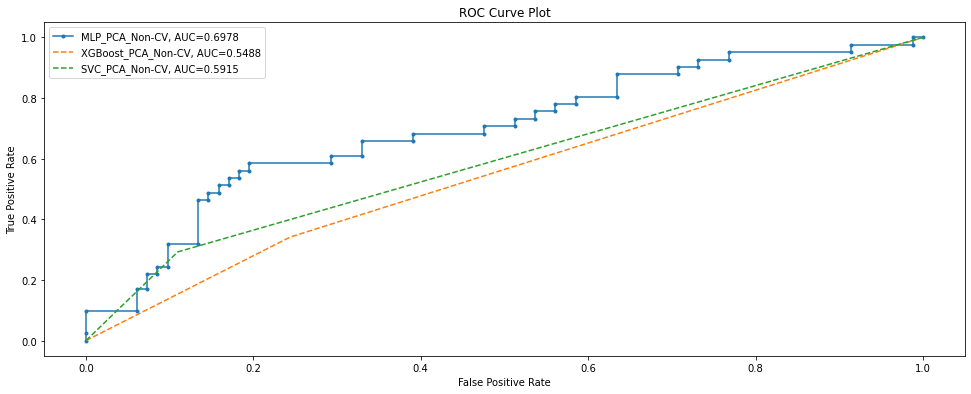

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,marker='.',label="MLP_PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot")
plt.legend()

## Training Models with PCA X Imputed by Multivariate Model and with Cross Validation

MLP Cross Validation

In [ ]:

# # K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X_reduced)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(71, activation='relu', input_dim=(69)))
  model.add(Dense(73, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  model.summary()

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 71)                4970      
                                                                 
 dense_1 (Dense)             (None, 73)                5256      
                                                                 
 dense_2 (Dense)             (None, 1)                 74        
                                                                 
Total params: 10,300
Trainable params: 10,300
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.9550431370735168; accuracy of 72.56097793579102%
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape             

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/MLP_Multivariate_imputed_PCA_with_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 
# # MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/MLP_Multivariate_imputed_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

6/6 [==============================] - 0s 2ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       106
           1       0.94      0.86      0.90        57

    accuracy                           0.93       163
   macro avg       0.94      0.92      0.92       163
weighted avg       0.93      0.93      0.93       163



In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)

In [ ]:
MLP_Multivariate_imputed_PCA_Cross_Validation_AUC

0.9156736180072824

In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/XGBOOST_Multivariate_imputed_PCA_with_Cross-Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 
# XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/XGBOOST_Multivariate_imputed_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb= round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
loaded_model.best_estimator_

XGBClassifier(colsample_bytree=0.75, learning_rate=0.3, max_depth=12,
              missing=nan, n_estimators=500, n_jobs=-1, subsample=0.75)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        82
           1       0.51      0.49      0.50        41

    accuracy                           0.67       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.67      0.67      0.67       123



In [ ]:
XGBoost_Multivariate_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_PCA_Cross_Validation_AUC

0.6280487804878049

In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/SVC_PCA_with_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 
# SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/PCA/Cross_Validation/SVC_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
loaded_model.best_estimator_

SVC(C=25, gamma=0.01)

In [ ]:
loaded_model.best_params_

{'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.73      0.76      0.74        82
           1       0.47      0.44      0.46        41

    accuracy                           0.65       123
   macro avg       0.60      0.60      0.60       123
weighted avg       0.64      0.65      0.65       123



In [ ]:
SVC_Multivariate_imputed_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
SVC_Multivariate_imputed_PCA_Cross_Validation_AUC

0.5975609756097561

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


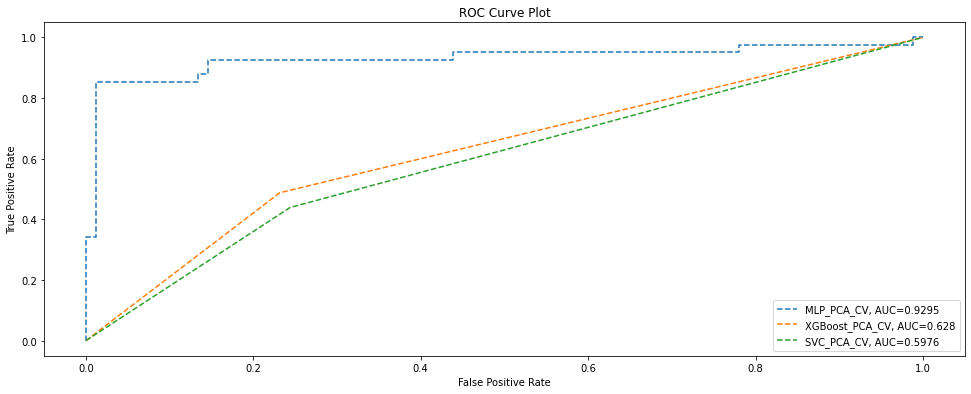

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',label="MLP_PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb,linestyle='--',label="XGBoost_PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc,linestyle='--',label="SVC_PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot")
plt.legend()

In [ ]:
# import matplotlib.pyplot as plt
# # data = [[MLP_Regressor_imputed_PCA_accuracy, XGBoost_Regressor_imputed_PCA_accuracy, SVC_Regressor_imputed_PCA_accuracy],
# # [MLP_Regressor_imputed_PCA_Cross_Validation_accuracy, XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy, SVC_Regressor_imputed_PCA_Cross_Validation_accuracy]
# # ]
# # set width of bar
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
 
# # set height of bar
# # IT = [12, 30, 1, 8, 22]
# # ECE = [28, 6, 16, 5, 10]
# # CSE = [29, 3, 24, 25, 17]
# MLP=[MLP_Multivariate_imputed_PCA_Non_Cross_accuracy,MLP_Multivariate_imputed_PCA_Cross_Validation_accuracy]
# XGB=[XGBoost_Multivariate_imputed_PCA_accuracy,XGBoost_Multivariate_imputed_PCA_Cross_Validation_accuracy]
# SVC=[SVC_Multivariate_imputed_PCA_accuracy,SVC_Multivariate_imputed_PCA_Cross_Validation_accuracy]
 
# # Set position of bar on X axis
# br1 = np.arange(len(MLP))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
 
# # Make the plot
# plt.bar(br1, MLP, color ='r', width = barWidth,
#         edgecolor ='grey', label ='MLP')
# plt.bar(br2, XGB, color ='g', width = barWidth,
#         edgecolor ='grey', label ='XGB')
# plt.bar(br3, SVC, color ='b', width = barWidth,
#         edgecolor ='grey', label ='SVC')
 
# # Adding Xticks
# plt.xlabel('ML Models trained with PCA data', fontweight ='bold', fontsize = 15)
# plt.ylabel('Model Accuracy', fontweight ='bold', fontsize = 15)
# plt.xticks([r + barWidth for r in range(len(MLP))],
#         ['Non-Cross-Validation','Cross-Validation'])
 
# plt.legend()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# # data = [[MLP_Regressor_imputed_PCA_accuracy, XGBoost_Regressor_imputed_PCA_accuracy, SVC_Regressor_imputed_PCA_accuracy],
# # [MLP_Regressor_imputed_PCA_Cross_Validation_accuracy, XGBoost_Regressor_imputed_PCA_Cross_Validation_accuracy, SVC_Regressor_imputed_PCA_Cross_Validation_accuracy]
# # ]
# # set width of bar
# barWidth = 0.25
# fig = plt.subplots(figsize =(12, 8))
 
# # set height of bar
# # IT = [12, 30, 1, 8, 22]
# # ECE = [28, 6, 16, 5, 10]
# # CSE = [29, 3, 24, 25, 17]
# MLP=[MLP_Multivariate_imputed_PCA_Non_Cross_AUC,MLP_Multivariate_imputed_PCA_Cross_Validation_AUC]
# XGB=[XGBoost_Multivariate_imputed_PCA_AUC,XGBoost_Multivariate_imputed_PCA_Cross_Validation_AUC]
# SVC=[SVC_Multivariate_imputed_PCA_AUC,SVC_Multivariate_imputed_PCA_Cross_Validation_AUC]
 
# # Set position of bar on X axis
# br1 = np.arange(len(MLP))
# br2 = [x + barWidth for x in br1]
# br3 = [x + barWidth for x in br2]
 
# # Make the plot
# plt.bar(br1, MLP, color ='r', width = barWidth,
#         edgecolor ='grey', label ='MLP')
# plt.bar(br2, XGB, color ='g', width = barWidth,
#         edgecolor ='grey', label ='XGB')
# plt.bar(br3, SVC, color ='b', width = barWidth,
#         edgecolor ='grey', label ='SVC')
 
# # Adding Xticks
# plt.xlabel('ML Models trained with PCA data', fontweight ='bold', fontsize = 15)
# plt.ylabel('AUC Score', fontweight ='bold', fontsize = 15)
# plt.xticks([r + barWidth for r in range(len(MLP))],
#         ['Non-Cross-Validation','Cross-Validation'])
 
# plt.legend()
# plt.show()

## Training Models with Non-PCA X,SMOTE and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
Ytrain.value_counts()

0    244
1    123
Name: Death, dtype: int64

In [ ]:
X.shape

(490, 116)

In [ ]:
# Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain, Ytrain = oversample.fit_resample(Xtrain, Ytrain)


In [ ]:
Ytrain.value_counts()

1    244
0    244
Name: Death, dtype: int64

In [ ]:
Xtrain.shape

(488, 116)

In [ ]:
# m = Sequential()
# m.add(Dense(118, activation='relu', input_dim=(116)))
# m.add(Dense(120, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))
# m.summary()

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/MLP_Non-PCA_without_Cross-Validation_SMOTE.sav'
# pickle.dump(m, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/MLP_Non-PCA_without_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()

print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))

4/4 [==============================] - 0s 3ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.79      0.74      0.77        82
           1       0.54      0.61      0.57        41

    accuracy                           0.70       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.71      0.70      0.70       123



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.676829268292683

## Explaining an MLP trained with Non-PCA, SMOTE without Cross Validation

In [ ]:
import shap


In [ ]:
explain = shap.KernelExplainer(loaded_model, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

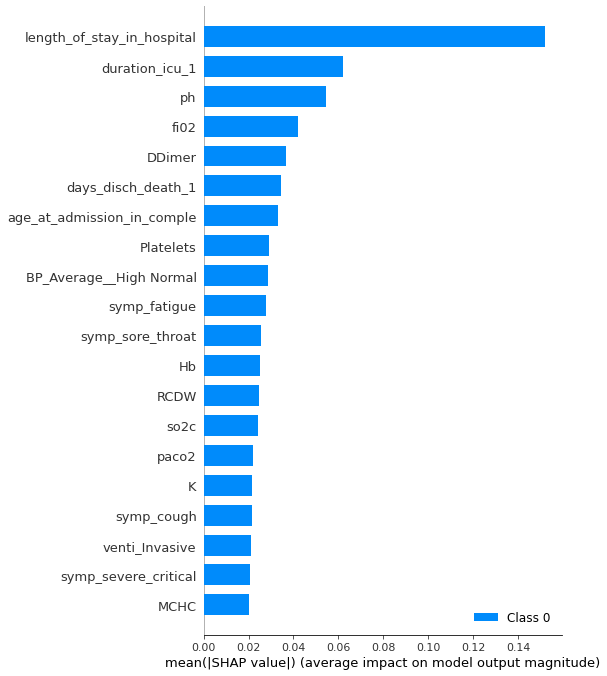

In [ ]:
shap.summary_plot(shap_values, Xtest)


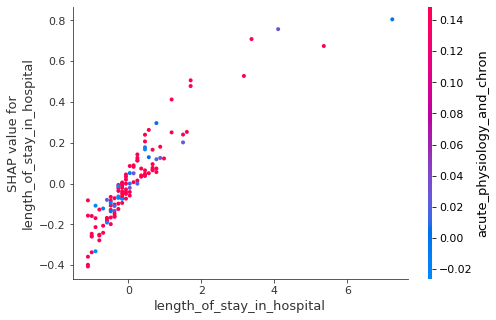

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values[0], Xtest)


In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(Xtrain, Ytrain)
# y_pred=full_boost.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/XGBOOST_Non-PCA_without_Cross-Validation_SMOTE.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/XGBOOST_Non-PCA_without_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        82
           1       0.67      0.78      0.72        41

    accuracy                           0.80       123
   macro avg       0.77      0.79      0.78       123
weighted avg       0.81      0.80      0.80       123



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.7926829268292683

##Explaining XGB trained on Non-PCA, SMOTE and Non Cross-Validation

In [ ]:
explainer = shap.TreeExplainer(loadedmodel,Xtrain)
shap_values = explainer(Xtest)


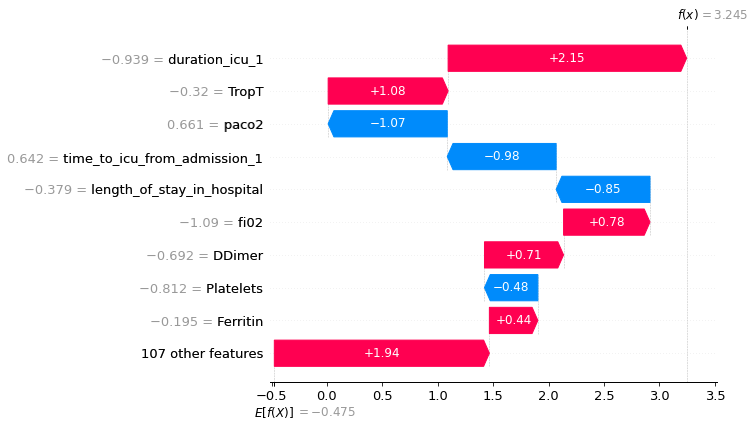

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


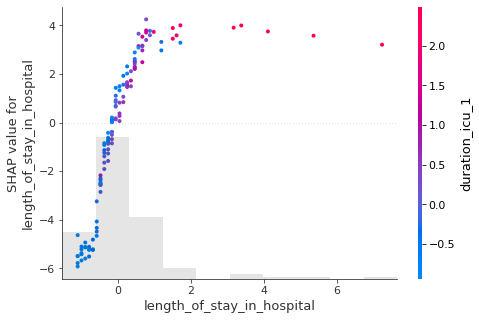

In [ ]:
shap.plots.scatter(shap_values[:,"length_of_stay_in_hospital"], color=shap_values)


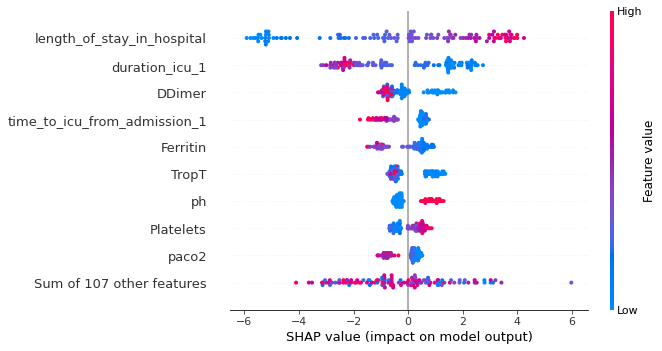

In [ ]:
shap.plots.beeswarm(shap_values)


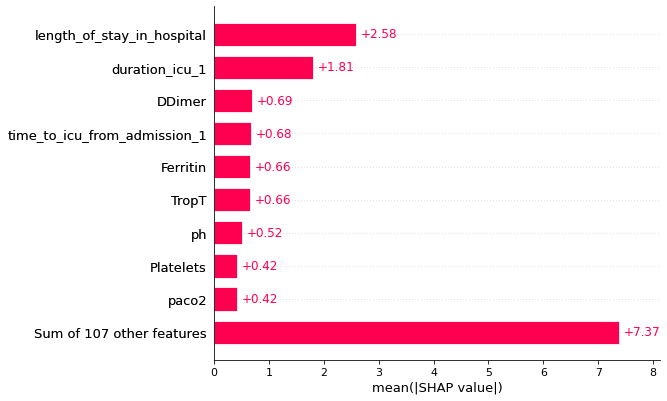

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# from sklearn.svm import SVC

# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/SVC_Non-PCA_without_Cross-Validation_SMOTE.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/SVC_Non-PCA_without_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        82
           1       0.60      0.59      0.59        41

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

## Explaining SVM trained with Non-PCA, SMOTE and Without Cross-Validation

In [ ]:
explain = shap.KernelExplainer(loaded_model.predict, Xtest)


X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

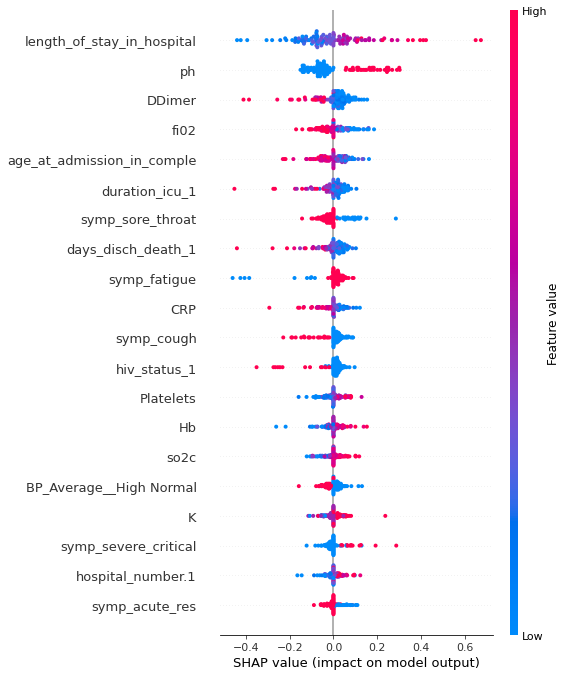

In [ ]:
shap.summary_plot(shap_values, Xtest)


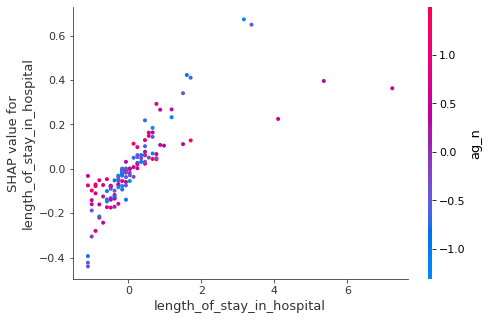

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values, Xtest)


118
['_merge', 'acute_physiology_and_chron', 'ag', 'ag_n', 'age_at_admission_in_comple', 'alt', 'antibiotics_no', 'antibiotics_yes', 'anticoagulants_no', 'anticoagulants_yes', 'antifungals_no', 'antifungals_yes', 'antivirals_no', 'antivirals_yes', 'asthma', 'basophils', 'bmi', 'bp_average__high', 'bp_average__mild_hypertension', 'bp_average__moderate_hypertension', 'bp_average__normal', 'bp_average__optimal', 'bp_average__severe_hypertension', 'cardiogenic_shock', 'ckd', 'clin', 'copd', 'corticosteroids_no', 'corticosteroids_yes', 'cpap', 'creatinine', 'crp', 'days_disch_death_1', 'ddimer', 'diab_mellitus', 'duration_icu_1', 'dysrhythmias', 'ferritin', 'fi02', 'flow', 'gender_female', 'gender_male', 'hb', 'hba1c', 'hco3std', 'hct', 'hiv_status_1', 'hospital_number', 'hyperlipidaemia', 'hypertension', 'immunodeficiency', 'inr', 'insulin_res', 'invasive', 'isch_heart_dis', 'lactate', 'length_of_stay_in_hospital', 'lymphocytes', 'mchc', 'mcv', 'monocytes', 'mpv', 'na', 'neutrophils', 'nor

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
Liblinear failed to converge, increase the number of iterations.
Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


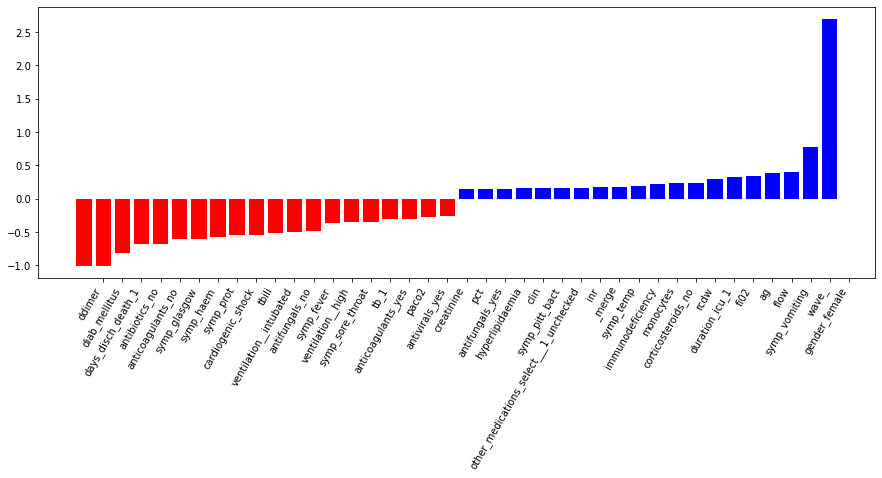

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(X)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(Xtrain, Ytrain)
plot_coefficients(svm, cv.get_feature_names())

Text(0.5, 0, 'Feature Importance')

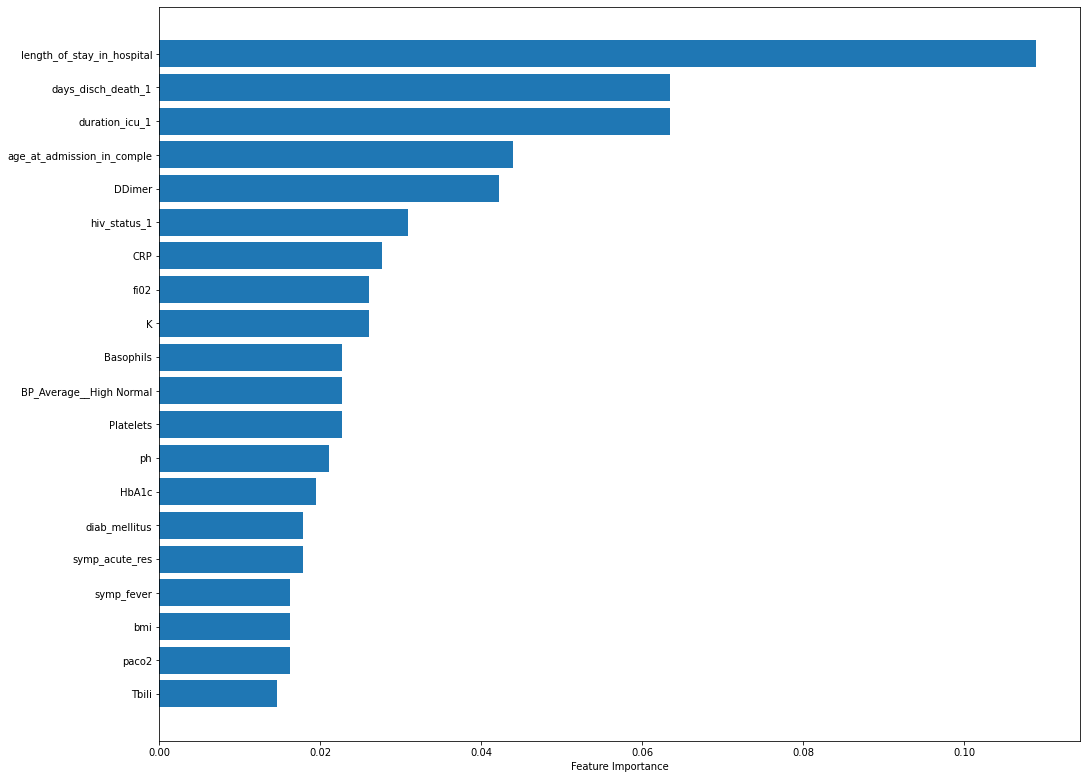

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(loaded_model, Xtest, Ytest)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features_names = Xtrain.columns
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx][-20:], perm_importance.importances_mean[sorted_idx][-20:])
plt.gcf().set_size_inches(16.5, 13.5)
plt.xlabel("Feature Importance")

In [ ]:
perm_importance.importances_mean[sorted_idx][:20]

array([-9.75609756e-03, -8.13008130e-03, -6.50406504e-03, -4.87804878e-03,
       -3.25203252e-03, -3.25203252e-03, -1.62601626e-03, -1.62601626e-03,
       -1.62601626e-03, -1.62601626e-03, -1.62601626e-03, -4.44089210e-17,
       -4.44089210e-17, -2.22044605e-17, -2.22044605e-17, -2.22044605e-17,
       -2.22044605e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
features[sorted_idx][:20]

array(['symp_joint_pains', 'sequential_organ_failure_a', 'symp_acute_kid',
       'hypertension', 'time_to_icu_from_admission_1', 'symp_vomiting',
       'symp_nausea', 'hyperlipidaemia', 'TropT',
       'ventilation__High Flow', 'symp_prot', 'symp_sore_throat',
       'symp_myalgia', 'insulin_res', 'BP_Average__Mild_Hypertension',
       'Monocytes', 'Lymphocytes', 'BP_Average__Moderate_Hypertension',
       'anticoagulants_Yes', 'anticoagulants_No'], dtype=object)

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


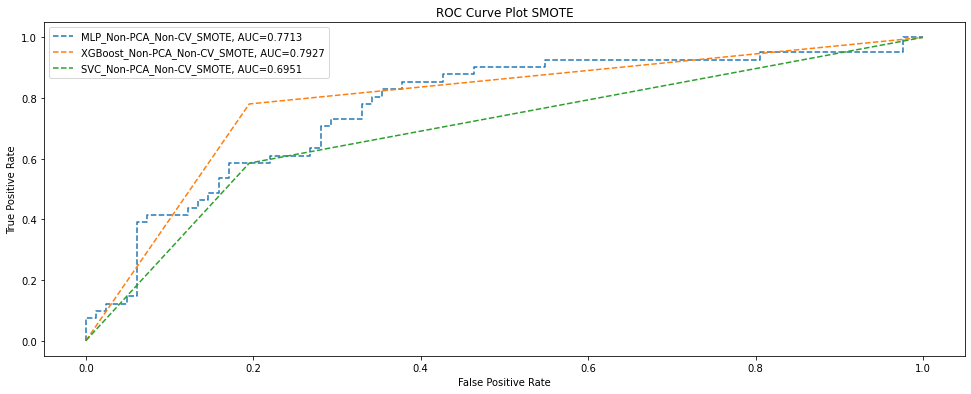

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV_SMOTE, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV_SMOTE, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV_SMOTE, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot SMOTE")
plt.legend()

## Training Models with Non-PCA X Imputed by Multivariate Model and without Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)

In [ ]:
Ytrain.value_counts()

0    244
1    123
Name: Death, dtype: int64

In [ ]:
Xtest.shape

(123, 116)

In [ ]:
# m = Sequential()
# m.add(Dense(118, activation='relu', input_dim=(116)))
# m.add(Dense(120, activation='relu'))
# m.add(Dense(num_classes, activation='sigmoid'))
# m.summary()

In [ ]:
# m.compile(loss='binary_crossentropy',
#               optimizer='RMSprop',
#               metrics=['accuracy'])
# history = m.fit(Xtrain, Ytrain,batch_size=batch_size,epochs=epochs,verbose=0,
#                     validation_data=(Xtest, Ytest))

In [ ]:
# loss,accuracy=m.evaluate(Xtest,Ytest)
# print("Accuracy: %.2f"%(accuracy*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/MLP_Non-PCA_without_Cross-Validation.sav'
# pickle.dump(m, open(filename, 'wb')) 
# # MLP_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/MLP_Non-PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))

4/4 [==============================] - 0s 4ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        82
           1       0.60      0.61      0.60        41

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
MLP_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.701219512195122

## Explaining MLP trained with Non-PCA and Non Cross Validation

In [ ]:
explain = shap.KernelExplainer(loaded_model, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

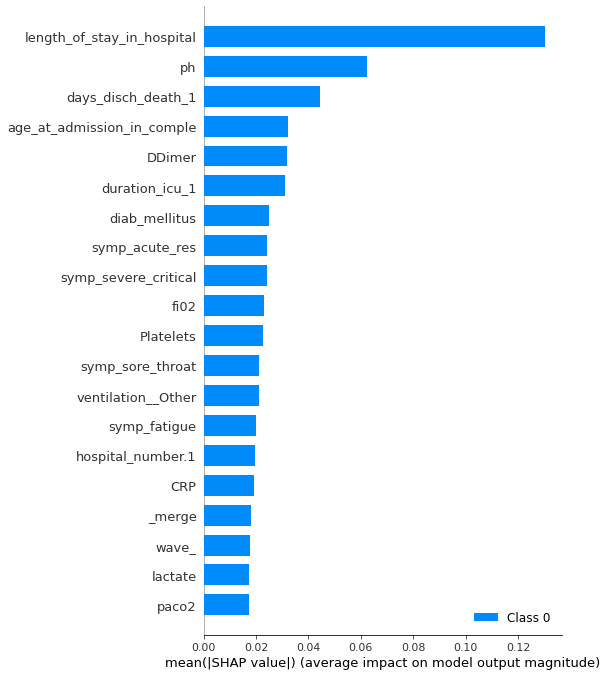

In [ ]:
shap.summary_plot(shap_values, Xtest)


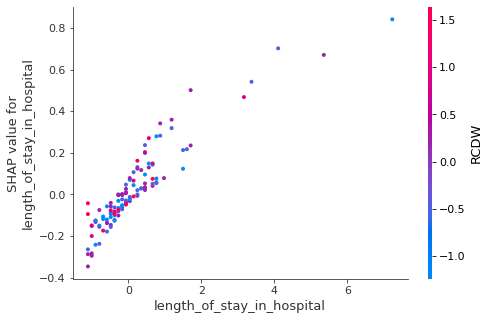

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values[0], Xtest)


In [ ]:
# full_boost=xgb.XGBClassifier(learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
# full_boost.fit(Xtrain, Ytrain)
# y_pred=full_boost.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/XGBOOST_Non-PCA_without_Cross-Validation.sav' 
# pickle.dump(full_boost, open(filename, 'wb')) 
# # XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/XGBOOST_Non-PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.72      0.71      0.72        41

    accuracy                           0.81       123
   macro avg       0.79      0.79      0.79       123
weighted avg       0.81      0.81      0.81       123



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.7865853658536586

## Explaining XGBoost Trained with Non-PCA and Non Cross Validation

In [ ]:
explainer = shap.TreeExplainer(loadedmodel,Xtrain)
shap_values = explainer(Xtest)


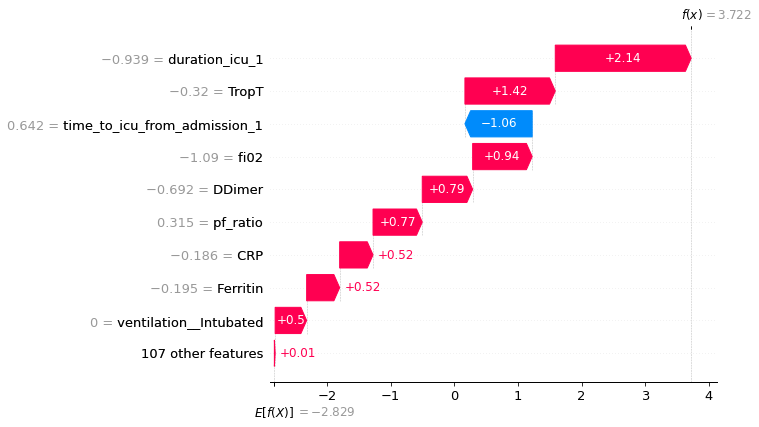

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


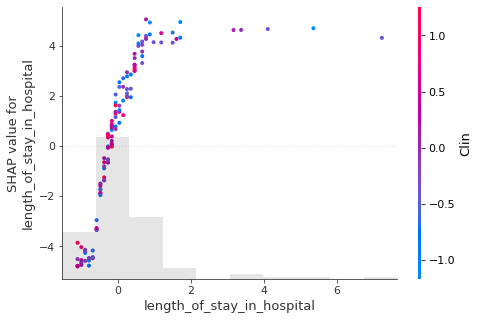

In [ ]:
shap.plots.scatter(shap_values[:,"length_of_stay_in_hospital"], color=shap_values)


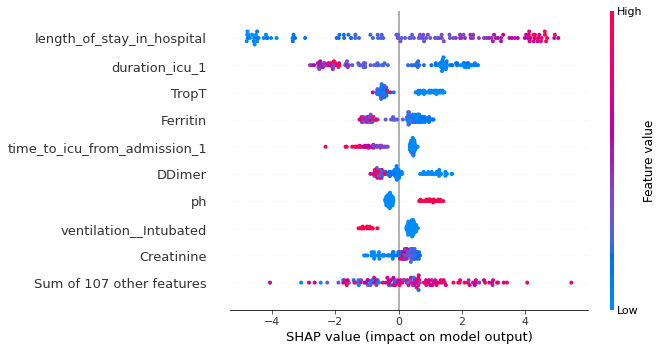

In [ ]:
shap.plots.beeswarm(shap_values)


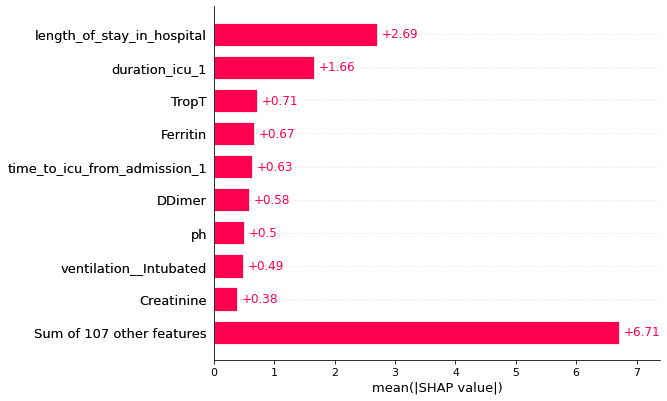

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# from sklearn.svm import SVC

# clf=SVC()
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

The accuracy is 71.54 %


In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/SVC_Non-PCA_without_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 
# SVC_Multivariate_imputed_Non_PCA_Non_Cross_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/SVC_Non-PCA_without_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        82
           1       0.64      0.34      0.44        41

    accuracy                           0.72       123
   macro avg       0.68      0.62      0.63       123
weighted avg       0.70      0.72      0.69       123



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
SVC_Multivariate_imputed_Non_PCA_Non_Cross_AUC

0.6219512195121952

## Explaining SVM trained with Non-PCA and Non Cross Validation 

In [ ]:
explain = shap.KernelExplainer(loaded_model.predict, Xtest)


X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

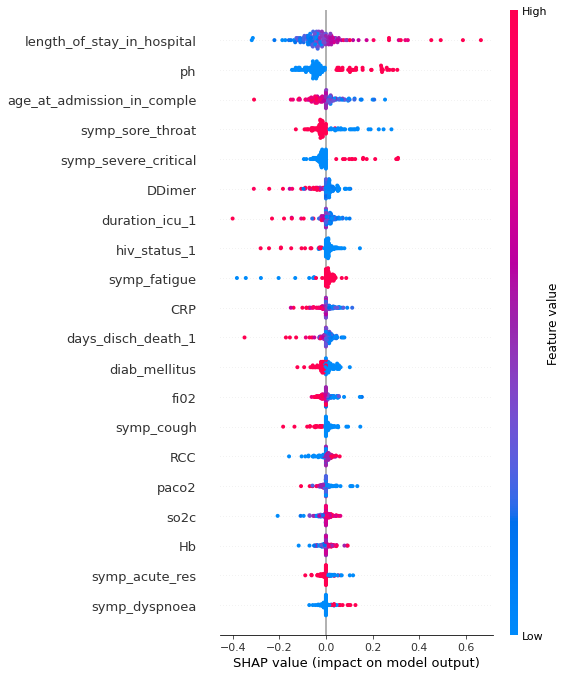

In [ ]:
shap.summary_plot(shap_values, Xtest)


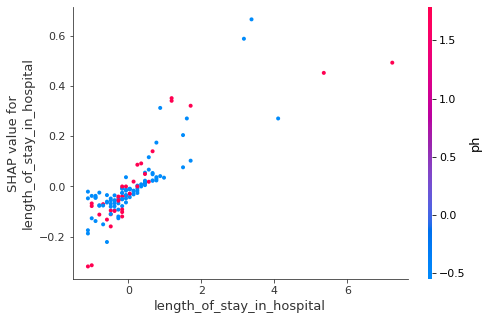

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values, Xtest)


Text(0.5, 0, 'Feature Importance')

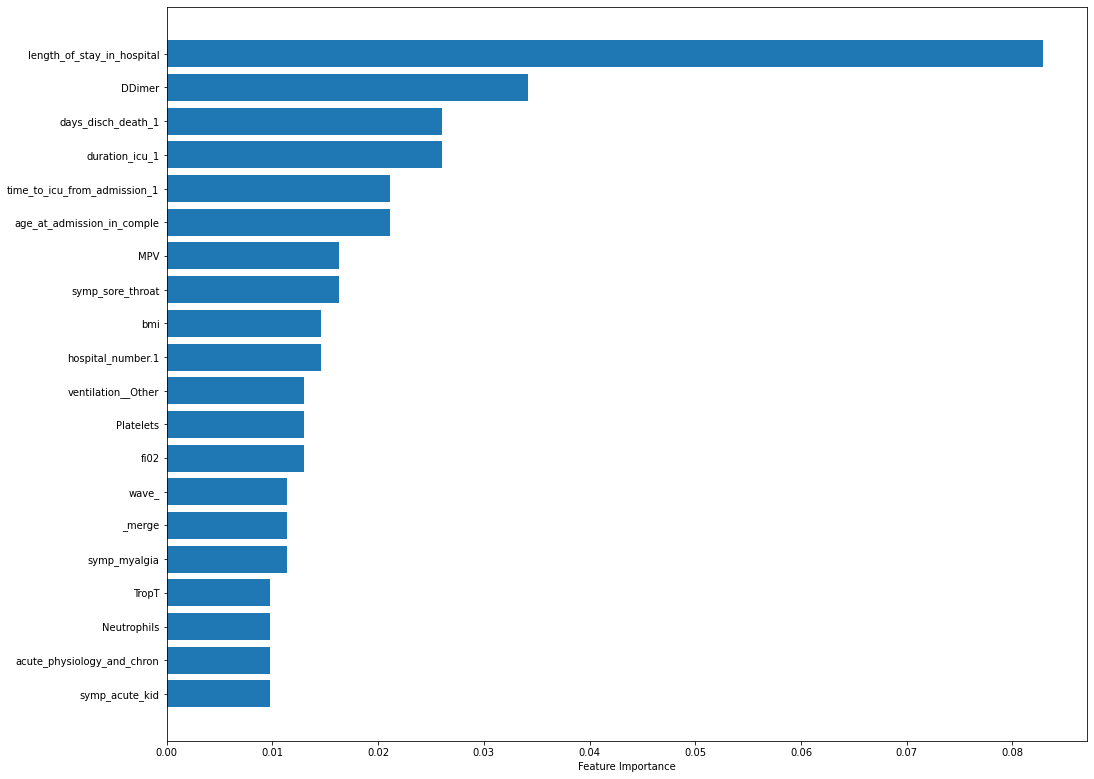

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(loaded_model, Xtest, Ytest)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features_names = Xtrain.columns
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx][-20:], perm_importance.importances_mean[sorted_idx][-20:])
plt.gcf().set_size_inches(16.5, 13.5)
plt.xlabel("Feature Importance")

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


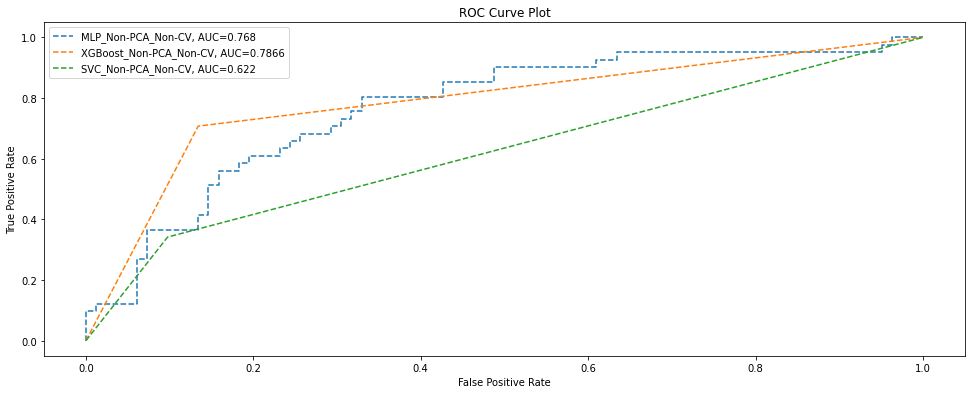

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_Non-CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_Non-CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_Non-CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot")
plt.legend()

### Training Models with Non-PCA X with SMOTE and with Cross Validation

In [ ]:
# Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
Xtrain, Ytrain = oversample.fit_resample(Xtrain, Ytrain)


In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(118, activation='relu', input_dim=(116)))
  model.add(Dense(120, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  model.summary()

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 118)               13806     
                                                                 
 dense_13 (Dense)            (None, 120)               14280     
                                                                 
 dense_14 (Dense)            (None, 1)                 121       
                                                                 
Total params: 28,207
Trainable params: 28,207
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 1.1035218238830566; accuracy of 71.34146094322205%
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape           

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/MLP_Non_PCA_with_Cross-Validation_SMOTE.sav'
# pickle.dump(model, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/MLP_Non_PCA_with_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

6/6 [==============================] - 0s 2ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       112
           1       0.90      0.88      0.89        51

    accuracy                           0.93       163
   macro avg       0.92      0.92      0.92       163
weighted avg       0.93      0.93      0.93       163



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)

In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.9188550420168068

## Explaining MLP trained with Non-PCA, SMOTE with Cross validation

In [ ]:
import shap


In [ ]:
explain = shap.KernelExplainer(loaded_model, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

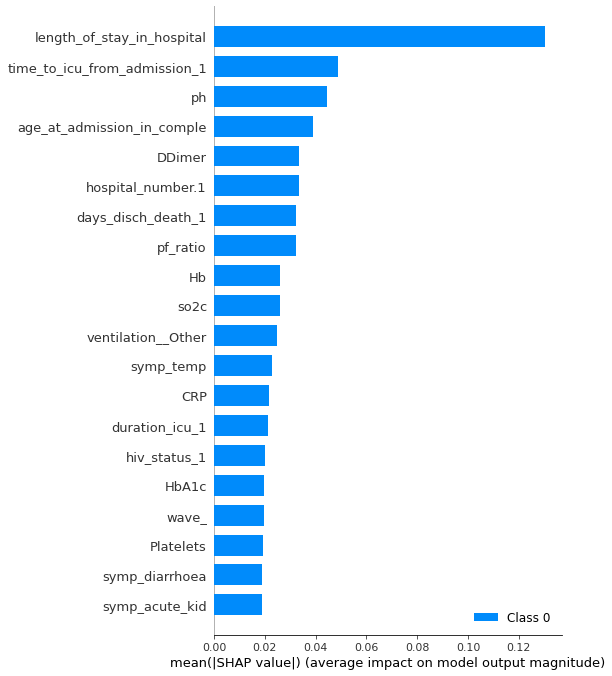

In [ ]:

shap.summary_plot(shap_values, Xtest)


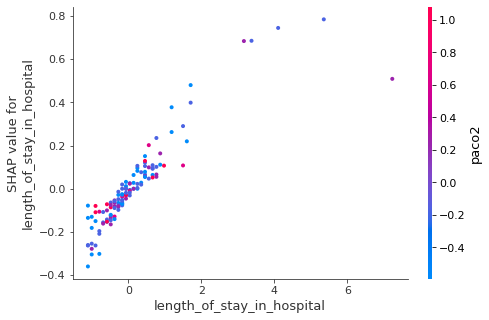

In [ ]:

shap.dependence_plot("length_of_stay_in_hospital", shap_values[0], Xtest)


In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/XGBOOST_Non_PCA_with_Cross-Validation_SMOTE.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 


In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/XGBOOST_Non_PCA_with_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
xgboost = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Non_Cross_Validation/XGBOOST_Non-PCA_without_Cross-Validation.sav', 'rb'))


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        82
           1       0.67      0.68      0.67        41

    accuracy                           0.78       123
   macro avg       0.75      0.76      0.75       123
weighted avg       0.78      0.78      0.78       123



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.7560975609756098

## Expaining XGBoost model trained with Non-PCA, SMOTE and with Cross Validation

In [ ]:

# explainer = shap.TreeExplainer(xgboost,Xtest)


In [ ]:
explainer = shap.TreeExplainer(loadedmodel.best_estimator_,Xtest)


In [ ]:
shap_values = explainer(Xtest)


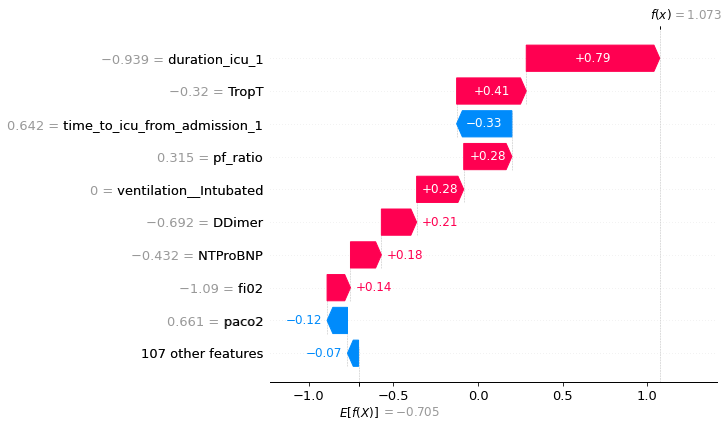

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


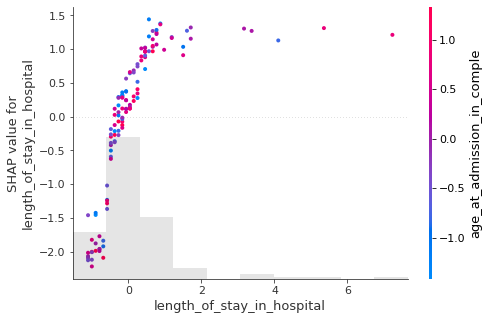

In [ ]:
shap.plots.scatter(shap_values[:,"length_of_stay_in_hospital"], color=shap_values)


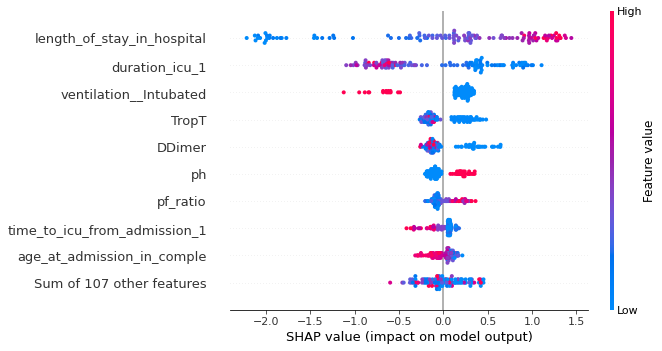

In [ ]:
shap.plots.beeswarm(shap_values)


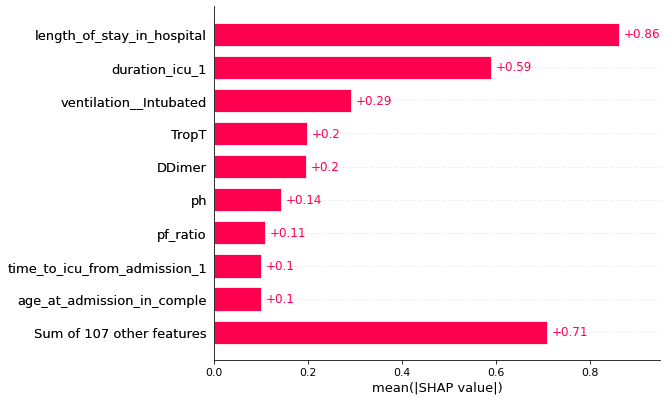

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/SVC_Non_PCA_with_Cross-Validation_SMOTE.sav'
# pickle.dump(clf, open(filename, 'wb')) 


In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/SVC_Non_PCA_with_Cross-Validation_SMOTE.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.73      0.78      0.75        41

    accuracy                           0.83       123
   macro avg       0.81      0.82      0.81       123
weighted avg       0.83      0.83      0.83       123



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.8170731707317073

## Explaining SVM model trained with Non-PCA, SMOTE and with Cross Validation

In [ ]:
explain = shap.KernelExplainer(loaded_model.predict, Xtest)


X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
shap_values = explain.shap_values(Xtest, nsamples=500)
shap_values

  0%|          | 0/123 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

array([[ 0.        ,  0.02566626,  0.05722582, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01960512,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01870481, -0.03015517, -0.06779118, ..., -0.01296487,
         0.00789462,  0.        ],
       ...,
       [-0.0429764 ,  0.        ,  0.11382589, ...,  0.        ,
         0.05467558, -0.03276379],
       [ 0.036046  ,  0.        ,  0.07445188, ...,  0.05276663,
         0.0610516 ,  0.06732202],
       [ 0.        ,  0.        , -0.02189813, ...,  0.        ,
         0.        ,  0.        ]])

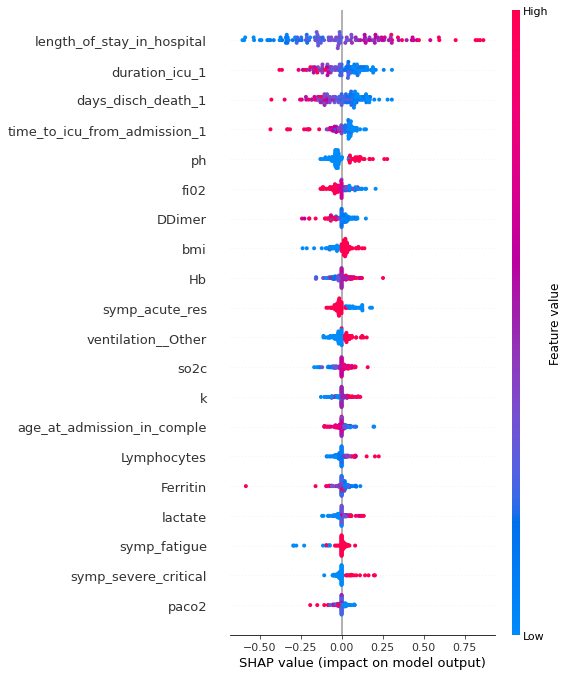

In [ ]:
shap.summary_plot(shap_values, Xtest)


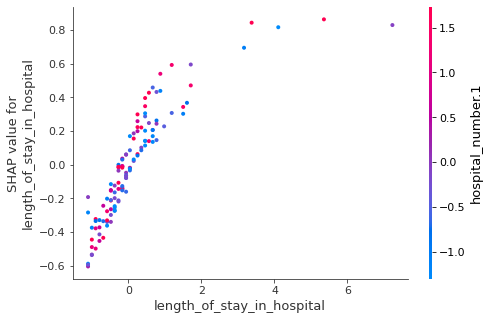

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values, Xtest)


Text(0.5, 0, 'Feature Importance')

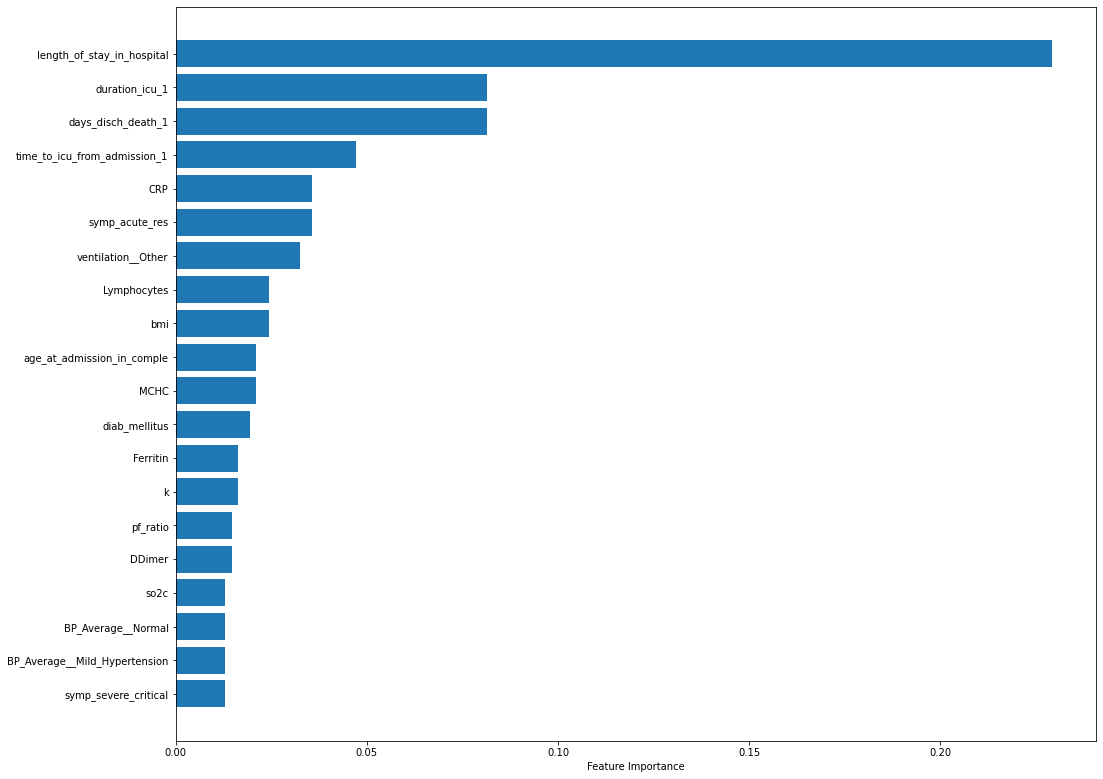

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(loaded_model, Xtest, Ytest)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features_names = Xtrain.columns
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx][-20:], perm_importance.importances_mean[sorted_idx][-20:])
plt.gcf().set_size_inches(16.5, 13.5)
plt.xlabel("Feature Importance")

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


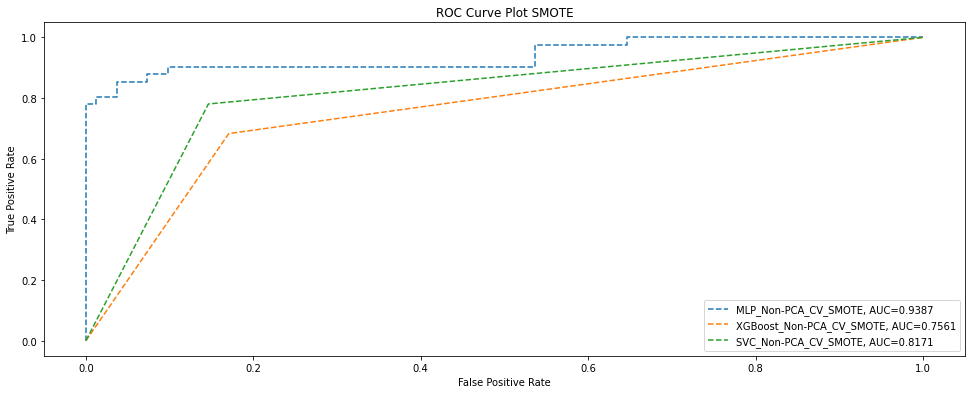

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV_SMOTE, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV_SMOTE, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV_SMOTE, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot SMOTE")
plt.legend()

### Training Models with Non-PCA X Imputed by Multivariate Model and with Cross Validation

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,stratify=y)
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# Xtrain, Ytrain = oversample.fit_resample(Xtrain, Ytrain)


In [ ]:
Ytrain.value_counts()

0    244
1    123
Name: Death, dtype: int64

In [ ]:

# K-fold Cross Validation model evaluation
acc_per_fold=[]
loss_per_fold=[]
inputs =np.array(X)
targets = np.array(y)
kfold = KFold(n_splits=3, shuffle=True)
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Dense(118, activation='relu', input_dim=(116)))
  model.add(Dense(120, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  model.summary()

  # Compile the model
  model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=epochs,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 118)               13806     
                                                                 
 dense_22 (Dense)            (None, 120)               14280     
                                                                 
 dense_23 (Dense)            (None, 1)                 121       
                                                                 
Total params: 28,207
Trainable params: 28,207
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 1.3990000486373901; accuracy of 74.39024448394775%
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape           

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/MLP_Non_PCA_with_Cross-Validation.sav'
# pickle.dump(model, open(filename, 'wb')) 
# # MLP_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float((classification_report(targets[test], y_pred)).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/MLP_Non_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(Ytest, y_pred)
auc_mlp = round(metrics.roc_auc_score(Ytest, y_pred), 4)

4/4 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.round(loaded_model.predict(inputs[test])).ravel()
print("\nCR by library method=\n",
          classification_report(targets[test], y_pred))

6/6 [==============================] - 0s 2ms/step

CR by library method=
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       113
           1       0.90      0.86      0.88        50

    accuracy                           0.93       163
   macro avg       0.92      0.91      0.91       163
weighted avg       0.93      0.93      0.93       163



In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(targets[test], y_pred)

In [ ]:
MLP_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.9078761061946903

## Explaining MLP trained with Non_PCA and with Cross validation

In [ ]:
explain = shap.KernelExplainer(loaded_model, Xtrain)
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

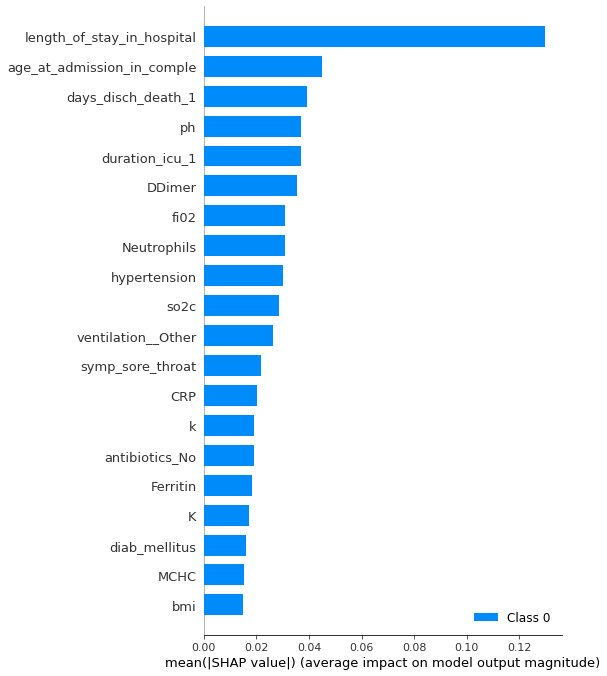

In [ ]:
shap.summary_plot(shap_values, Xtest)


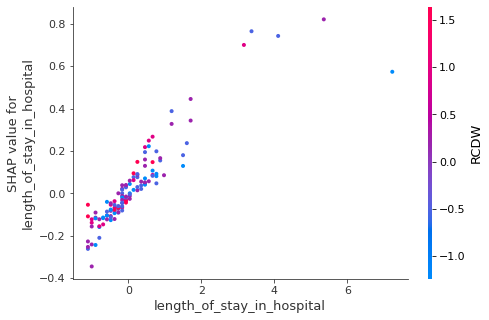

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values[0], Xtest)


In [ ]:
# cv = KFold(n_splits=3)
# PARAMETERS = {"subsample":[0.5, 0.75, 1],
#               "colsample_bytree":[0.5, 0.75, 1],
#               "max_depth":[2,5, 6, 12],
#               "min_child_weight":[1,5,15],
#               "learning_rate":[0.3, 0.1, 0.03],
#               "n_estimators":[100,500,1000]}
# full = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
# model_gs = GridSearchCV(full,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gs.fit(Xtrain,Ytrain, eval_metric="error",verbose=0)
# y_pred=model_gs.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/XGBOOST_Non_PCA_with_Cross-Validation.sav'
# pickle.dump(model_gs, open(filename, 'wb')) 
# # XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loadedmodel = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/XGBOOST_Non_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loadedmodel.predict(Xtest)
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(Ytest, y_pred)
auc_xgb = round(metrics.roc_auc_score(Ytest, y_pred), 4)


In [ ]:
y_pred=np.round(loadedmodel.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.84      0.83      0.83        82
           1       0.67      0.68      0.67        41

    accuracy                           0.78       123
   macro avg       0.75      0.76      0.75       123
weighted avg       0.78      0.78      0.78       123



In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
XGBoost_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.7560975609756098

## Explaining XGBoost trained with Non-PCA and with Cross Validation

In [ ]:
explainer = shap.TreeExplainer(xgboost,Xtrain)
shap_values = explainer(Xtest)


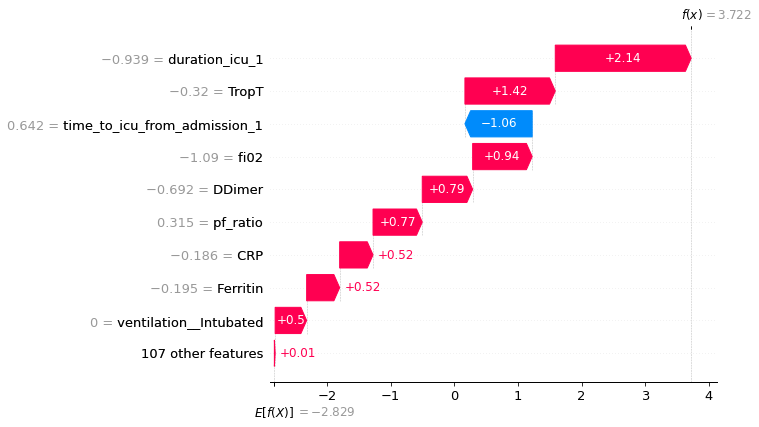

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


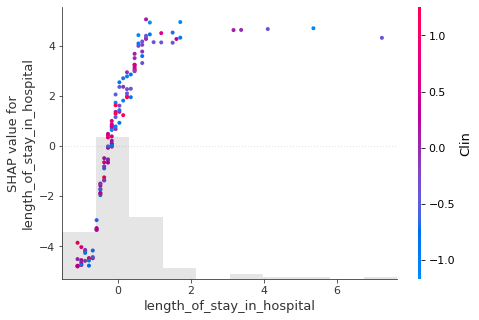

In [ ]:
shap.plots.scatter(shap_values[:,"length_of_stay_in_hospital"], color=shap_values)


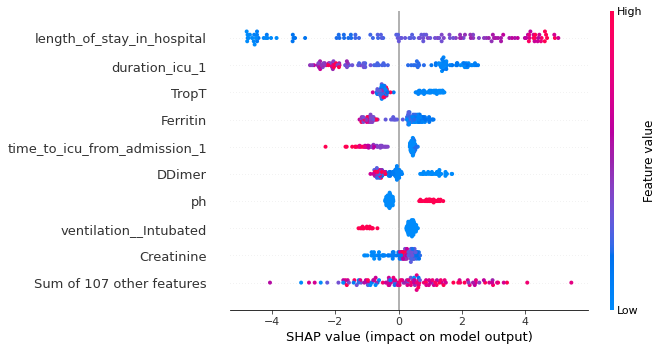

In [ ]:
shap.plots.beeswarm(shap_values)


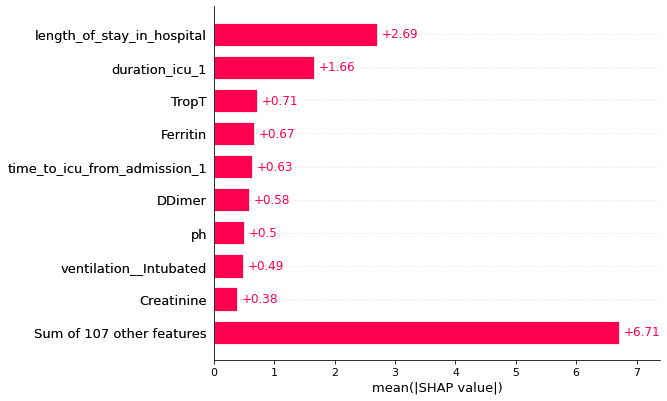

In [ ]:
shap.plots.bar(shap_values)


In [ ]:
# tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
#                     {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
#                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}] 
# clf = GridSearchCV(SVC(), tuned_parameters, cv=cv,
#                        scoring='accuracy')
# clf.fit(Xtrain,Ytrain)
# y_pred=clf.predict(Xtest)
# print("The accuracy is %.2f"%(accuracy_score(y_pred,Ytest)*100),"%")

In [ ]:
# filename = '/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/SVC_Non_PCA_with_Cross-Validation.sav'
# pickle.dump(clf, open(filename, 'wb')) 
# # SVC_Multivariate_imputed_Non_PCA_Cross_Validation_accuracy=float(classification_report(Ytest, y_pred).split()[15])

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/Explainable-AI/Paper-1/models/Non_PCA/Cross_Validation/SVC_Non_PCA_with_Cross-Validation.sav', 'rb'))
y_pred = loaded_model.predict(Xtest)
fpr_svc, tpr_svc, _ = metrics.roc_curve(Ytest, y_pred)
auc_svc = round(metrics.roc_auc_score(Ytest, y_pred), 4)

In [ ]:
y_pred=np.round(loaded_model.predict(Xtest)).ravel()
print("\nCR by library method=\n",
          classification_report(Ytest, y_pred))


CR by library method=
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.73      0.78      0.75        41

    accuracy                           0.83       123
   macro avg       0.81      0.82      0.81       123
weighted avg       0.83      0.83      0.83       123



In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_AUC=metrics.roc_auc_score(Ytest, y_pred)

In [ ]:
SVC_Multivariate_imputed_Non_PCA_Cross_Validation_AUC

0.8170731707317073

## Explaining SVM Trained with Non-PCA with Cross Validation

In [ ]:
explain = shap.KernelExplainer(loaded_model.predict, Xtest)


X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
shap_values = explain.shap_values(Xtest, nsamples=500)


  0%|          | 0/123 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprec

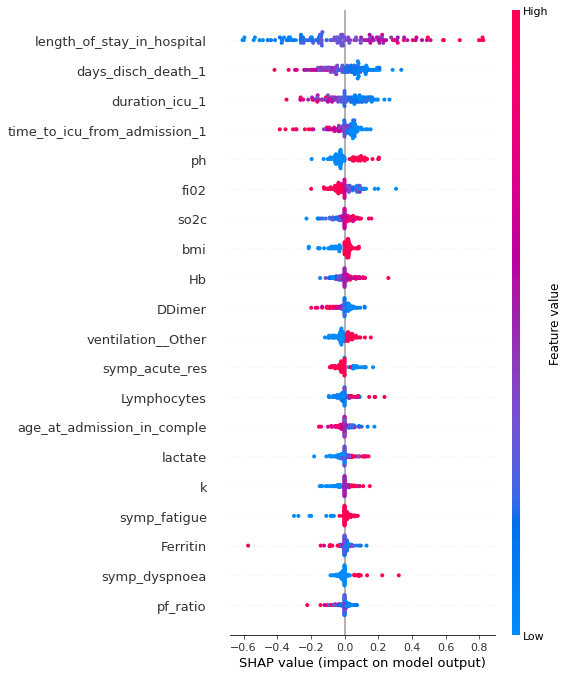

In [ ]:
shap.summary_plot(shap_values, Xtest)


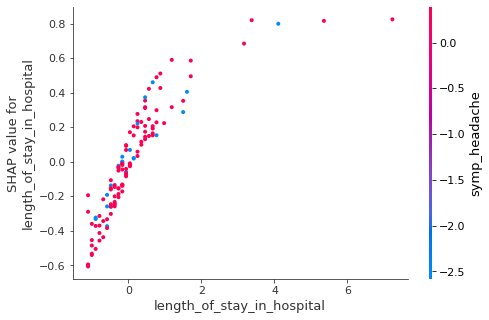

In [ ]:
shap.dependence_plot("length_of_stay_in_hospital", shap_values, Xtest)


Text(0.5, 0, 'Feature Importance')

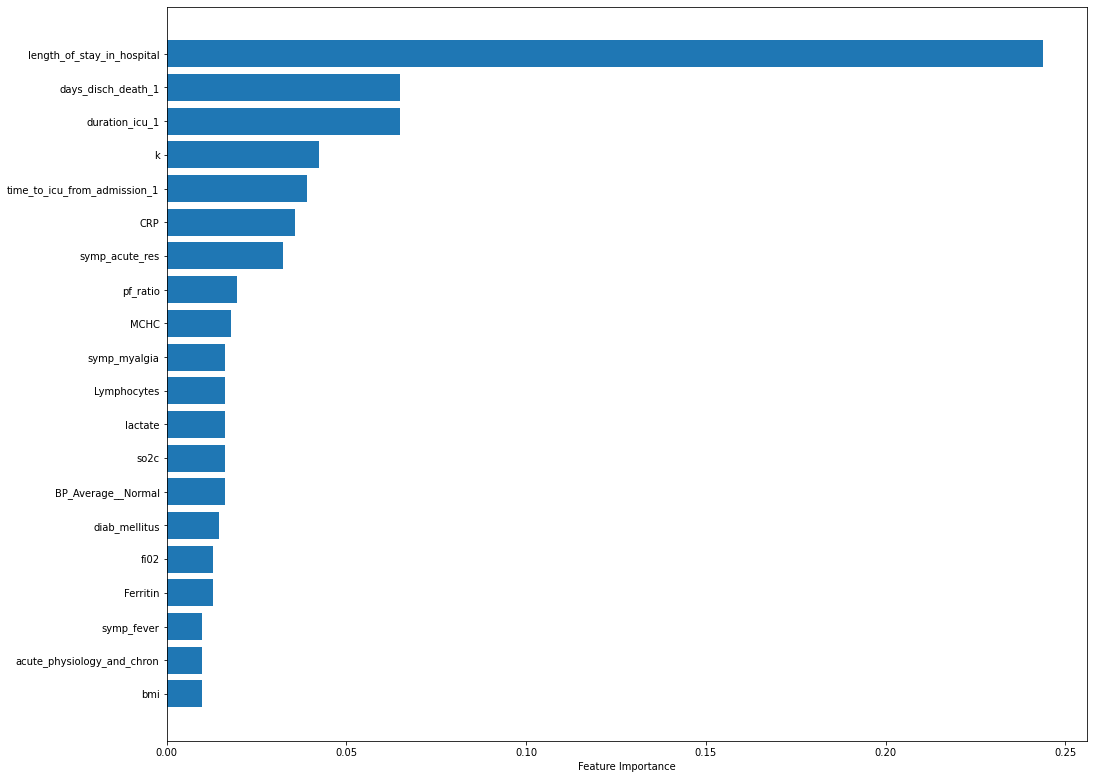

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(loaded_model, Xtest, Ytest)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features_names = Xtrain.columns
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx][-20:], perm_importance.importances_mean[sorted_idx][-20:])
plt.gcf().set_size_inches(16.5, 13.5)
plt.xlabel("Feature Importance")

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


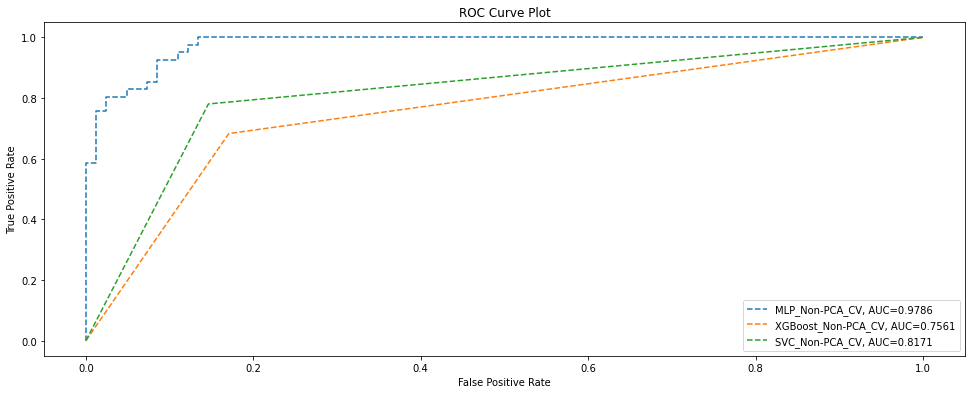

In [ ]:
plt.gcf().set_size_inches(16.5, 13.5)
plt.subplot(211)
plt.plot(fpr_mlp,tpr_mlp, linestyle='--',label="MLP_Non-PCA_CV, AUC="+str(auc_mlp))
plt.subplot(211)
plt.plot(fpr_xgb,tpr_xgb, linestyle='--',label="XGBoost_Non-PCA_CV, AUC="+str(auc_xgb))
plt.subplot(211)
plt.plot(fpr_svc,tpr_svc, linestyle='--',label="SVC_Non-PCA_CV, AUC="+str(auc_svc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve Plot")
plt.legend()